<a href="https://colab.research.google.com/github/davidlealo/sic_ai_2025_sept/blob/main/4_pnl/contribuciones_estudiantes/clasificacion_sentimientos_texto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Coding Exercise #0511

In [2]:
import numpy as np
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from nltk.corpus import stopwords
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
warnings.filterwarnings('ignore')               # Turn the warnings off.
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

### 1. NLP classification analysis:

#### 1.1. Read in data:
Movie review data from Cornell CS department. <br>
- The data can be found [here](https://www.cs.cornell.edu/people/pabo/movie-review-data). <br>
- Download the “polarity dataset” and unzip. <br>
- Under the "txt_sentoken” folder, there are “pos” and “neg" subfolders. <br>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Specify the folder and read in the subfolders.
reviews = load_files('/content/drive/txt_sentoken')
my_docs, y = reviews.data, reviews.target

In [5]:
len(my_docs)

2000

In [6]:
np.unique(y, return_counts=True)

(array([0, 1]), array([1000, 1000]))

In [7]:
y

array([0, 1, 1, ..., 1, 0, 0])

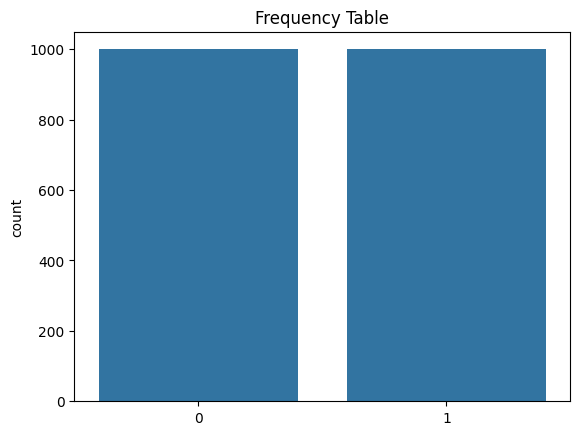

In [8]:
# Visualize the response variable.
sns.countplot(x=y).set_title("Frequency Table")
plt.show()

#### 1.2. Data pre-processing:

In [9]:
corpus = []
for i in range(0, len(my_docs)):
    review = re.sub(r'\W', ' ', str(my_docs[i]))
    review = review.lower()
    review = re.sub(r'^br$', ' ', review)
    review = re.sub(r'\s+br\s+',' ',review)
    review = re.sub(r'\s+[a-z]\s+', ' ',review)
    review = re.sub(r'^b\s+', '', review)
    review = re.sub(r'\s+', ' ', review)               # Remove the excess white spaces introduced in the previous steps.
    corpus.append(review)

In [10]:
# Just show a document.
corpus[0]

'arnold schwarzenegger has been an icon for action enthusiasts since the late 80 but lately his films have been very sloppy and the one liners are getting worse nit hard seeing arnold as mr freeze in batman and robin especially when he says tons of ice jokes but hey he got 15 million what it matter to him nonce again arnold has signed to do another expensive blockbuster that can compare with the likes of the terminator series true lies and even eraser nin this so called dark thriller the devil gabriel byrne has come upon earth to impregnate woman robin tunney which happens every 1000 years and basically destroy the world but apparently god has chosen one man and that one man is jericho cane arnold himself nwith the help of trusty sidekick kevin pollack they will stop at nothing to let the devil take over the world nparts of this are actually so absurd that they would fit right in with dogma nyes the film is that weak but it better than the other blockbuster right now sleepy hollow but 

#### 1.3. Create a TF IDF representation:

In [11]:
TFIDF = TfidfVectorizer(max_features = 1000, min_df = 2, max_df = 0.6, stop_words = stopwords.words('english'))
TFIDF.fit(corpus)                                          # Create a TF IDF model.
X = TFIDF.transform(corpus).toarray()
X.shape

(2000, 1000)

#### 1.4. Logistic regression training and testing:

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1234)

In [13]:
X_train

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.03530471, ..., 0.        , 0.        ,
        0.0286583 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [14]:
# Training.
LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

In [15]:
# Testing.
y_pred = LR.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

In [16]:
# Confusion matrix.
print(conf_mat)

[[235  66]
 [ 51 248]]


In [17]:
# Accuracy.
print(np.round(acc,3))

0.805


### 1.5. Decision Tree training and testing:

In [18]:
from sklearn.tree import DecisionTreeClassifier

# Training.
DT = DecisionTreeClassifier(random_state=1234)
DT.fit(X_train, y_train)

# Testing.
y_pred_dt = DT.predict(X_test)
conf_mat_dt = confusion_matrix(y_test, y_pred_dt)
acc_dt = accuracy_score(y_test, y_pred_dt)

print("Confusion Matrix (Decision Tree):")
print(conf_mat_dt)
print("\nAccuracy (Decision Tree):")
print(np.round(acc_dt, 3))

Confusion Matrix (Decision Tree):
[[186 115]
 [118 181]]

Accuracy (Decision Tree):
0.612


### 1.6. Naive Bayes training and testing:

In [19]:
from sklearn.naive_bayes import GaussianNB

# Training.
NB = GaussianNB()
NB.fit(X_train, y_train)

# Testing.
y_pred_nb = NB.predict(X_test)
conf_mat_nb = confusion_matrix(y_test, y_pred_nb)
acc_nb = accuracy_score(y_test, y_pred_nb)

print("Confusion Matrix (Naive Bayes):")
print(conf_mat_nb)
print("\nAccuracy (Naive Bayes):")
print(np.round(acc_nb, 3))

Confusion Matrix (Naive Bayes):
[[232  69]
 [ 91 208]]

Accuracy (Naive Bayes):
0.733


# Task
Create a Gradio app that takes text input, predicts its sentiment (positive or negative) using the trained model, and provides an explanation of the result.

## Install gradio

### Subtask:
Install the Gradio library.


**Reasoning**:
The subtask is to install the Gradio library. I will use pip to install it.



In [20]:
%pip install gradio

## Define prediction function

### Subtask:
Create a Python function that takes text as input, preprocesses it using the same steps as the training data, transforms it using the trained TF-IDF vectorizer, and then predicts the sentiment using the best performing model (Logistic Regression based on the previous steps).


**Reasoning**:
Define a Python function to preprocess the input text, transform it using the trained TF-IDF vectorizer, and predict the sentiment using the Logistic Regression model.



In [21]:
def predict_sentiment(text):
    """
    Preprocesses the input text, transforms it using TF-IDF, and predicts sentiment.

    Args:
        text: The input text string.

    Returns:
        The predicted sentiment class label (0 for negative, 1 for positive).
    """
    # Apply preprocessing steps
    review = re.sub(r'\W', ' ', str(text))
    review = review.lower()
    review = re.sub(r'^br$', ' ', review)
    review = re.sub(r'\s+br\s+',' ',review)
    review = re.sub(r'\s+[a-z]\s+', ' ',review)
    review = re.sub(r'^b\s+', '', review)
    review = re.sub(r'\s+', ' ', review)

    # Transform the preprocessed text using the trained TF-IDF vectorizer
    # Wrap the preprocessed text in a list as TFIDF.transform expects a list
    text_tfidf = TFIDF.transform([review]).toarray()

    # Predict the sentiment using the trained Logistic Regression model
    prediction = LR.predict(text_tfidf)

    # Return the predicted class label
    return prediction[0]

## Create gradio interface

### Subtask:
Build the Gradio interface using the defined prediction function and launch the app.


**Reasoning**:
Build the Gradio interface using the defined prediction function and launch the app.



In [22]:
import gradio as gr

# Create a Gradio interface
interface = gr.Interface(
    fn=predict_sentiment,
    inputs="text",
    outputs="label",
    title="Movie Review Sentiment Analysis",
    description="Enter a movie review to get a sentiment prediction (0: Negative, 1: Positive)."
)

# Launch the Gradio interface
interface.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://5c7aba9eb3305c6521.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


## Explain the output

### Subtask:
Add explanations within the Gradio app to clarify the predicted sentiment (positive or negative) to the user.


**Reasoning**:
Modify the predict_sentiment function to return a descriptive sentiment string and update the Gradio interface output type.



In [23]:
import gradio as gr

def predict_sentiment(text):
    """
    Preprocesses the input text, transforms it using TF-IDF, and predicts sentiment.

    Args:
        text: The input text string.

    Returns:
        A string indicating the predicted sentiment ("Negative" or "Positive").
    """
    # Apply preprocessing steps
    review = re.sub(r'\W', ' ', str(text))
    review = review.lower()
    review = re.sub(r'^br$', ' ', review)
    review = re.sub(r'\s+br\s+',' ',review)
    review = re.sub(r'\s+[a-z]\s+', ' ',review)
    review = re.sub(r'^b\s+', '', review)
    review = re.sub(r'\s+', ' ', review)

    # Transform the preprocessed text using the trained TF-IDF vectorizer
    # Wrap the preprocessed text in a list as TFIDF.transform expects a list
    text_tfidf = TFIDF.transform([review]).toarray()

    # Predict the sentiment using the trained Logistic Regression model
    prediction = LR.predict(text_tfidf)

    # Return descriptive sentiment string
    if prediction[0] == 0:
        return "Negative"
    else:
        return "Positive"

# Create a Gradio interface
interface = gr.Interface(
    fn=predict_sentiment,
    inputs="text",
    outputs="text",  # Change output to "text"
    title="Movie Review Sentiment Analysis",
    description="Enter a movie review to get a sentiment prediction (Negative or Positive)."
)

# Launch the Gradio interface
interface.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://5e48f44da6b169115b.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


## Summary:

### Data Analysis Key Findings

*   The `gradio` library was successfully installed (or confirmed to be already installed).
*   A Python function `predict_sentiment` was created to handle text preprocessing, TF-IDF transformation using the trained vectorizer, and sentiment prediction using the trained Logistic Regression model.
*   The `predict_sentiment` function was updated to return descriptive strings ("Negative" or "Positive") instead of numerical labels (0 or 1).
*   A Gradio interface was successfully built and launched, using the updated `predict_sentiment` function, with text input and text output to display the sentiment explanation.

### Insights or Next Steps

*   The Gradio app successfully provides sentiment predictions with clear explanations, making it user-friendly.
*   Consider adding more detailed explanations in the app, such as confidence scores or highlighting key terms contributing to the prediction, for greater transparency.


# Task
Create a Gradio app that uses a Logistic Regression model with optimized hyperparameters for both the model and the `TfidfVectorizer` to classify text sentiment. The app should be user-friendly and provide clear explanations of the prediction results.

## Define an evaluation function

### Subtask:
Create a function that takes the hyperparameters for `TfidfVectorizer` and `LogisticRegression` as input, trains the model, and returns the accuracy on the test set.


**Reasoning**:
Define a function to train the Logistic Regression model with given hyperparameters for both the TF-IDF vectorizer and the model, and return the accuracy.



In [24]:
def train_and_evaluate(tfidf_params, lr_params):
    """
    Trains a Logistic Regression model with given hyperparameters and evaluates its accuracy.

    Args:
        tfidf_params: Dictionary of hyperparameters for TfidfVectorizer.
        lr_params: Dictionary of hyperparameters for LogisticRegression.

    Returns:
        The accuracy score on the test set.
    """
    # Instantiate and fit TfidfVectorizer
    tfidf = TfidfVectorizer(**tfidf_params)
    X = tfidf.fit_transform(corpus).toarray()

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

    # Instantiate and fit LogisticRegression
    lr = LogisticRegression(**lr_params)
    lr.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = lr.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

## Perform hyperparameter tuning

### Subtask:
Use a search method (like GridSearchCV or RandomSearchCV) to find the best combination of hyperparameters for `TfidfVectorizer` and `LogisticRegression` based on the evaluation function.


**Reasoning**:
Implement hyperparameter tuning using GridSearchCV for both TfidfVectorizer and LogisticRegression.



In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Define parameter grid
param_grid = {
    'tfidf__max_features': [500, 1000, 2000],
    'tfidf__min_df': [1, 2, 3],
    'tfidf__max_df': [0.5, 0.6, 0.7],
    'lr__C': [0.1, 1, 10],
    'lr__solver': ['liblinear', 'lbfgs']
}

# Create a pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=stopwords.words('english'))),
    ('lr', LogisticRegression())
])

# Instantiate GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(corpus, y)

# Print the best hyperparameters and score
print("Best hyperparameters:")
print(grid_search.best_params_)
print("\nBest cross-validation accuracy:")
print(grid_search.best_score_)

Best hyperparameters:
{'lr__C': 1, 'lr__solver': 'liblinear', 'tfidf__max_df': 0.6, 'tfidf__max_features': 2000, 'tfidf__min_df': 2}

Best cross-validation accuracy:
0.851


## Train the final model

### Subtask:
Train the `TfidfVectorizer` and `LogisticRegression` with the best hyperparameters found in the previous step.


**Reasoning**:
Train the TfidfVectorizer and LogisticRegression with the best hyperparameters found in the previous step.



In [26]:
# Instantiate TfidfVectorizer with best hyperparameters
TFIDF_tuned = TfidfVectorizer(max_df=0.6, max_features=2000, min_df=2, stop_words=stopwords.words('english'))

# Fit and transform the corpus
X_tuned = TFIDF_tuned.fit_transform(corpus).toarray()

# Split the data
X_train_tuned, X_test_tuned, y_train_tuned, y_test_tuned = train_test_split(X_tuned, y, test_size=0.3, random_state=1234)

# Instantiate LogisticRegression with best hyperparameters
LR_tuned = LogisticRegression(C=1, solver='liblinear')

# Fit the Logistic Regression model
LR_tuned.fit(X_train_tuned, y_train_tuned)

LogisticRegression(C=1, solver='liblinear')

## Define prediction function

### Subtask:
Create a Python function that takes text as input, preprocesses it using the same steps as the training data, transforms it using the optimized TF-IDF vectorizer, and then predicts the sentiment using the optimized Logistic Regression model.


**Reasoning**:
Define a Python function to preprocess the input text, transform it using the trained TF-IDF vectorizer, and predict the sentiment using the Logistic Regression model.



In [27]:
def predict_sentiment_tuned(text):
    """
    Preprocesses the input text, transforms it using the tuned TF-IDF, and predicts sentiment using the tuned LR model.

    Args:
        text: The input text string.

    Returns:
        The predicted sentiment class label (0 for negative, 1 for positive).
    """
    # Apply preprocessing steps
    review = re.sub(r'\W', ' ', str(text))
    review = review.lower()
    review = re.sub(r'^br$', ' ', review)
    review = re.sub(r'\s+br\s+',' ',review)
    review = re.sub(r'\s+[a-z]\s+', ' ',review)
    review = re.sub(r'^b\s+', '', review)
    review = re.sub(r'\s+', ' ', review)

    # Transform the preprocessed text using the trained and tuned TF-IDF vectorizer
    # Wrap the preprocessed text in a list as TFIDF_tuned.transform expects a list
    text_tfidf_tuned = TFIDF_tuned.transform([review]).toarray()

    # Predict the sentiment using the trained and tuned Logistic Regression model
    prediction_tuned = LR_tuned.predict(text_tfidf_tuned)

    # Return the predicted class label
    return prediction_tuned[0]

## Create gradio interface

### Subtask:
Build the Gradio interface using the defined prediction function and launch the app.


**Reasoning**:
Build the Gradio interface using the defined prediction function and launch the app.



In [30]:
import gradio as gr

# Create a Gradio interface
interface = gr.Interface(
    fn=predict_sentiment_tuned,
    inputs="text",
    outputs="label",
    title="Movie Review Sentiment Analysis (Optimized Model)",
    description="Enter a movie review to get a sentiment prediction (0: Negative, 1: Positive) using an optimized Logistic Regression model."
)

# Launch the Gradio interface
interface.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://4c98a9c92bc88fe90e.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


## Explain the output

### Subtask:
Add explanations within the Gradio app to clarify the predicted sentiment (positive or negative) to the user.


**Reasoning**:
Modify the predict_sentiment_tuned function to return a descriptive sentiment string and update the Gradio interface output type.



In [29]:
import gradio as gr

def predict_sentiment_tuned(text):
    """
    Preprocesses the input text, transforms it using the tuned TF-IDF, and predicts sentiment using the tuned LR model.

    Args:
        text: The input text string.

    Returns:
        A string indicating the predicted sentiment ("Negative" or "Positive").
    """
    # Apply preprocessing steps
    review = re.sub(r'\W', ' ', str(text))
    review = review.lower()
    review = re.sub(r'^br$', ' ', review)
    review = re.sub(r'\s+br\s+',' ',review)
    review = re.sub(r'\s+[a-z]\s+', ' ',review)
    review = re.sub(r'^b\s+', '', review)
    review = re.sub(r'\s+', ' ', review)

    # Transform the preprocessed text using the trained and tuned TF-IDF vectorizer
    # Wrap the preprocessed text in a list as TFIDF_tuned.transform expects a list
    text_tfidf_tuned = TFIDF_tuned.transform([review]).toarray()

    # Predict the sentiment using the trained and tuned Logistic Regression model
    prediction_tuned = LR_tuned.predict(text_tfidf_tuned)

    # Return descriptive sentiment string
    if prediction_tuned[0] == 0:
        return "Negative"
    else:
        return "Positive"

# Create a Gradio interface
interface = gr.Interface(
    fn=predict_sentiment_tuned,
    inputs="text",
    outputs="text",  # Change output to "text"
    title="Movie Review Sentiment Analysis (Optimized Model)",
    description="Enter a movie review to get a sentiment prediction (Negative or Positive) using an optimized Logistic Regression model."
)

# Launch the Gradio interface
interface.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://ee2bbc378dc5489d19.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


## Summary:

### Data Analysis Key Findings

*   Hyperparameter tuning using GridSearchCV identified the best parameters for the `TfidfVectorizer` as `max_df=0.6`, `max_features=2000`, and `min_df=2`, and for the `LogisticRegression` model as `C=1` and `solver='liblinear'`.
*   The best cross-validation accuracy achieved with the optimized hyperparameters was 0.851.
*   The final `TfidfVectorizer` and `LogisticRegression` models were trained using these optimized hyperparameters.
*   A prediction function was created that preprocesses input text, transforms it using the tuned TF-IDF vectorizer, and predicts sentiment using the tuned Logistic Regression model.
*   The prediction function was modified to return descriptive sentiment labels ("Negative" or "Positive") instead of numerical class labels (0 or 1) for better user understanding.
*   A Gradio interface was successfully built and launched, using the prediction function to provide a user-friendly web application for sentiment analysis.

### Insights or Next Steps

*   The optimized model demonstrates good performance with a cross-validation accuracy of 0.851, indicating its potential for sentiment classification.
*   Further improvements could involve exploring more advanced text preprocessing techniques or experimenting with different machine learning models to potentially increase accuracy.
